# Google Play Store Apps Data [Data from Data Camp]

This dataset consists of web scraped data of more than 10,000 Google Play Store apps and 60,000 app reviews. `apps_data.csv` consists of data about the apps such as category, number of installs, and price. `review_data.csv` holds reviews of the apps, including the text of the review and sentiment scores. You can join the two tables on the column, `App`.

### Data Dictionary (from source)

***data_app.csv***

| variable       | class     | description                                                                  |
|:---------------|:----------|:-----------------------------------------------------------------------------|
| App            | character | The application name                                                         |
| Category       | character | The category the app belongs to                                              |
| Rating         | numeric   | Overall user rating of the app                                               |
| Reviews        | numeric   | Number of user reviews for the app                                           |
| Size           | character | The size of the app                                                          |
| Installs       | character | Number of user installs for the app                                          |
| Type           | character | Either "Paid" or "Free"                                                      |
| Price          | character | Price of the app                                                             |
| Content Rating | character | The age group the app is targeted at - "Children" / "Mature 21+" / "Adult"   |
| Genres         | character | Possibly multiple genres the app belongs to                                  |
| Last Updated   | character | The date the app was last updated                                            |
| Current Ver    | character | The current version of the app                                               |
| Android Ver    | character | The Android version needed for this app                                      |

**data_reviews.csv**

| variable               | class        | description                                           |
|:-----------------------|:-------------|:------------------------------------------------------|
| App                    | character    | The application name                                  |
| Translated_Review      | character    | User review (translated to English)                   |
| Sentiment              | character    | The sentiment of the user - Positive/Negative/Neutral |
| Sentiment_Polarity     | character    | The sentiment polarity score                          |
| Sentiment_Subjectivity | character    | The sentiment subjectivity score                      |

In [36]:
#load library
library(tidyverse)
library(dplyr)

#observe data_1
df_app <- read_csv('data_apps.csv.gz', show_col_types = FALSE)
head(df_app,20)

App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up


In [37]:
df_app %>%
    summarise(min = min(Rating))

min
<dbl>
NaN


In [38]:
#observe data_2
df_rew <- read_csv('data_reviews.csv.gz', show_col_types = FALSE)

df_rew

App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
<chr>,<chr>,<chr>,<dbl>,<dbl>
10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.0000000,0.5333333
10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.2500000,0.2884615
10 Best Foods for You,nan,nan,NaN,NaN
10 Best Foods for You,Works great especially going grocery store,Positive,0.4000000,0.8750000
10 Best Foods for You,Best idea us,Positive,1.0000000,0.3000000
10 Best Foods for You,Best way,Positive,1.0000000,0.3000000
10 Best Foods for You,Amazing,Positive,0.6000000,0.9000000
10 Best Foods for You,nan,nan,NaN,NaN
10 Best Foods for You,"Looking forward app,",Neutral,0.0000000,0.0000000


# 01. Find highest review from 10 most Category

## Set data for ready to manipulate

In [39]:
library(dplyr)
library(ggplot2)
names(df_app) <- tolower(names(df_app))#for easy to use
names(df_rew) <- tolower(names(df_rew))

#clean out nan
df_rew <- df_rew %>%
	filter(sentiment != "nan")

head(df_app)#for check
head(df_rew)

app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
<chr>,<chr>,<chr>,<dbl>,<dbl>
10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.00,0.5333333
10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.2884615
10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.8750000
10 Best Foods for You,Best idea us,Positive,1.00,0.3000000
10 Best Foods for You,Best way,Positive,1.00,0.3000000
10 Best Foods for You,Amazing,Positive,0.60,0.9000000


In [40]:
df_check_dup <-df_app %>%
	count(category,app)%>%
	arrange(desc(n),category,app)

df_check_dup

df_app %>%
	summarise(count_app = n()) # for check n of app

category,app,n
<chr>,<chr>,<int>
SPORTS,"CBS Sports App - Scores, News, Stats & Watch Live",8
SPORTS,ESPN,7
GAME,8 Ball Pool,6
GAME,Bowmasters,6
GAME,Candy Crush Saga,6
GAME,Helix Jump,6
GAME,Sniper 3D Gun Shooter: Free Shooting Games - FPS,6
GAME,Subway Surfers,6
GAME,Temple Run 2,6


count_app
<int>
10840


### Remove duplicate app
by sort data column reviews ascending when duplicate it duplicate data is lower score 

In [41]:
df_app %>%
	filter(category == "COMMUNICATION")%>%
	arrange(reviews, app)

app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AC-BL,COMMUNICATION,NaN,0,4.3M,50+,Free,0,Everyone,Communication,"April 20, 2018",1.7,2.1 and up
BA SALES,COMMUNICATION,NaN,0,2.9M,1+,Free,0,Everyone,Communication,"January 31, 2018",1.0,4.0.3 and up
BJ - Confidential,COMMUNICATION,NaN,0,3.2M,10+,Free,0,Teen,Communication,"April 23, 2018",1.7,4.1 and up
BQ Partners,COMMUNICATION,NaN,0,Varies with device,"1,000+",Free,0,Everyone,Communication,"July 27, 2018",Varies with device,Varies with device
BlueDV AMBE,COMMUNICATION,NaN,0,Varies with device,"1,000+",Free,0,Everyone,Communication,"May 23, 2018",Varies with device,Varies with device
CK Call NEW,COMMUNICATION,NaN,0,4.2M,10+,Free,0,Everyone,Communication,"April 26, 2017",3.8.8,2.2 and up
CW Ringtone (Morse Code generator),COMMUNICATION,NaN,0,269k,10+,Paid,$2.49,Everyone,Communication,"March 16, 2018",1.0.2,2.2 and up
Carpooling FH Hagenberg,COMMUNICATION,NaN,0,Varies with device,100+,Free,0,Everyone,Communication,"May 18, 2017",Varies with device,Varies with device
DG Card,COMMUNICATION,NaN,0,Varies with device,100+,Free,0,Everyone,Communication,"August 15, 2017",Varies with device,Varies with device


In [42]:
df_app_sort_fordup <- df_app %>% 
	arrange(desc(reviews),category, app)

df_app_sort_fordup

app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


### Remove duplicate data by column app

In [43]:
df_rmdupapp <- df_app[!duplicated(df_app$app), ]#remove dup app
df_rmdupapp %>%
	summarise(total_app = n())# for check n of app

df_rmdupapp%>%
	arrange(desc(reviews),category, app)

total_app
<int>
9659


app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
Clash of Clans,GAME,4.6,44891723,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
"Security Master - Antivirus, VPN, AppLock, Booster",TOOLS,4.7,24900999,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device


### Calculate total reviews each category

In [44]:
top_cat <- df_rmdupapp %>%
	select(app:reviews) %>%
	group_by(category)%>%
	summarise(total_reviews = sum(reviews)/1000000, count_app = n())%>%
	arrange(desc(total_reviews))%>%
	head(10)

## Graph 10 categorys have most reviews.

category,total_reviews,count_app
<chr>,<dbl>,<int>
GAME,622.29871,959
COMMUNICATION,285.81137,315
TOOLS,229.35658,827
SOCIAL,227.92780,239
FAMILY,143.82549,1832
PHOTOGRAPHY,105.35127,281
VIDEO_PLAYERS,67.48457,163
PRODUCTIVITY,55.59065,374
PERSONALIZATION,53.54308,376


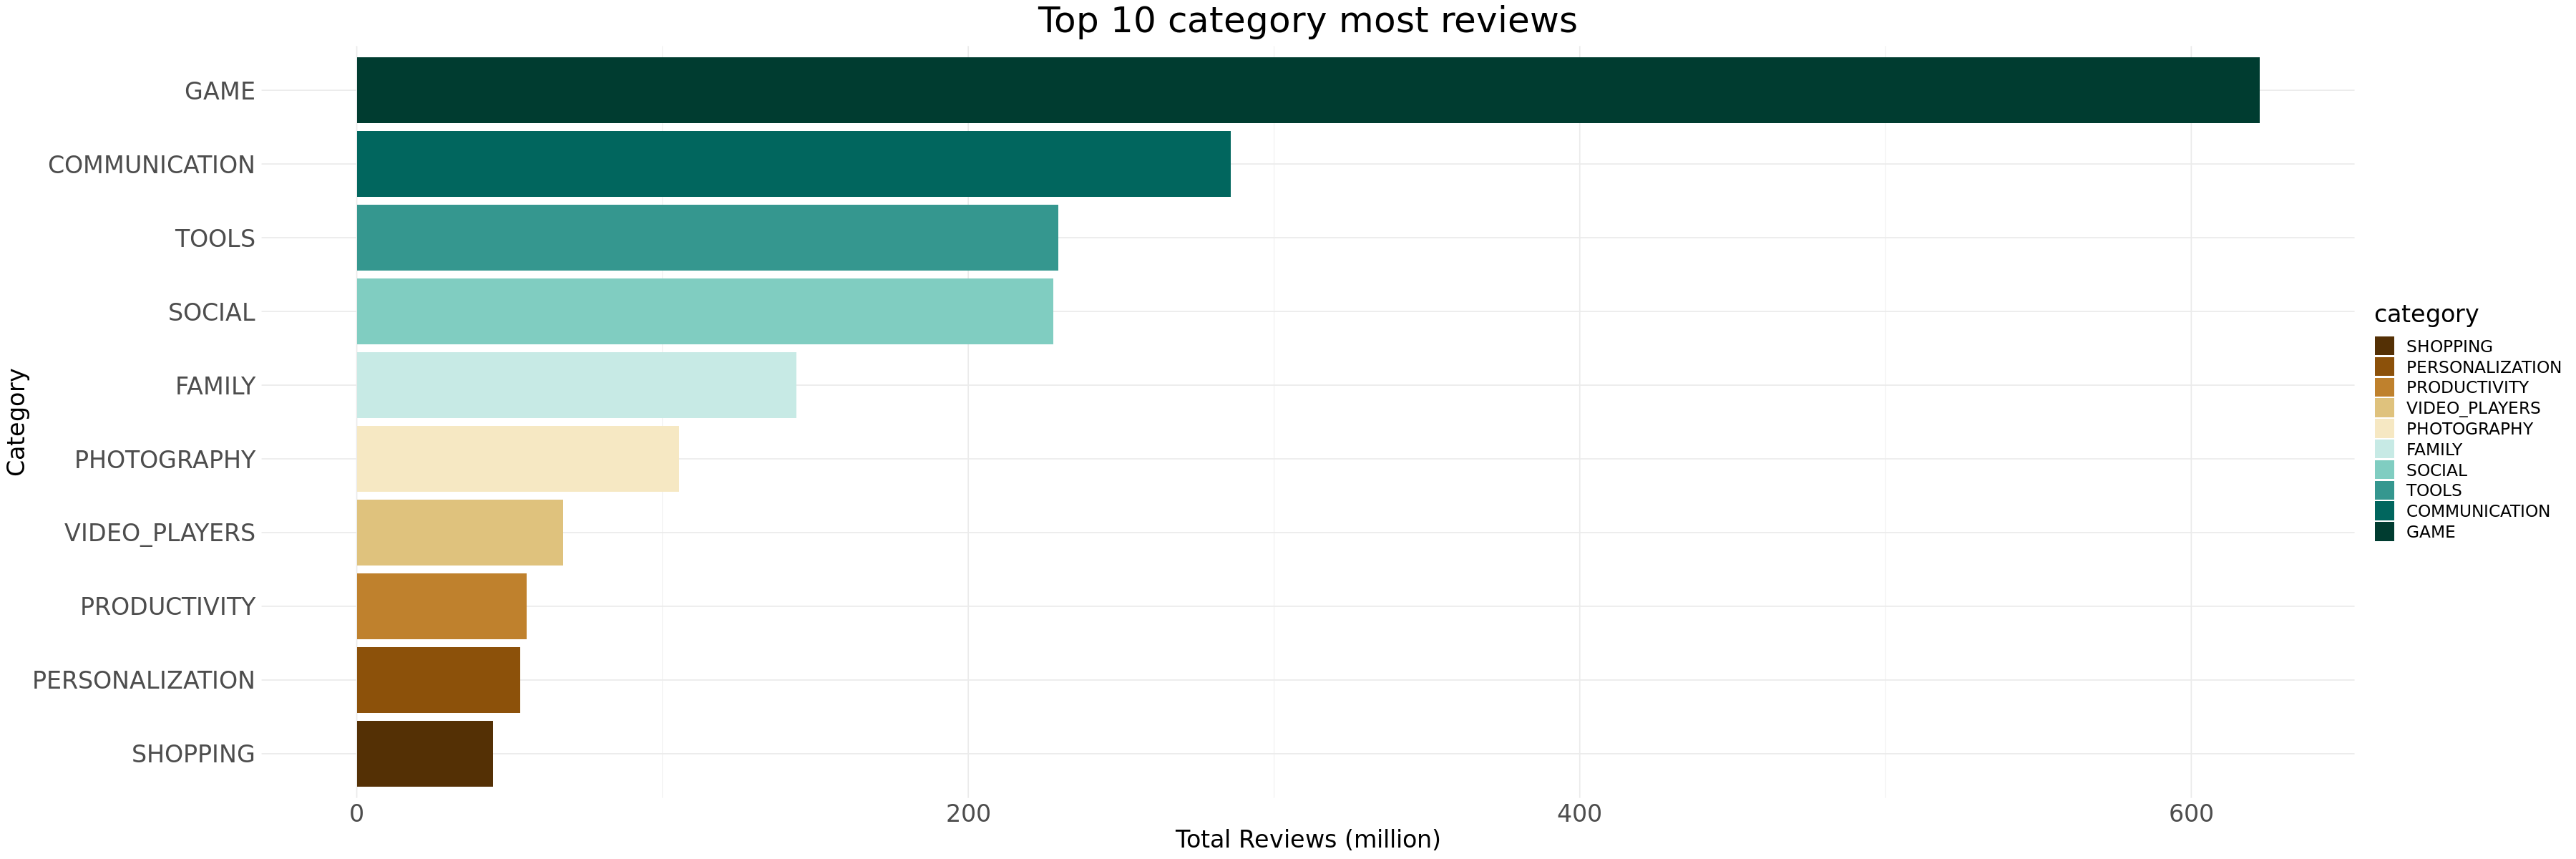

In [83]:
top_cat
	
top_cat %>%
	ggplot(aes(x= reorder(category, total_reviews), y= total_reviews, fill = reorder(category, total_reviews) ))+
	geom_col()+
	coord_flip()+
	ylab("Total Reviews (million)")+xlab("Category")+
	ggtitle("Top 10 category most reviews")+
	scale_fill_brewer(type = "div", palette = 1)+
	theme_minimal()+
	scale_y_continuous()+
	labs(fill = "category")+
	theme(plot.title = element_text(hjust = 0.5,size= 30),
		  axis.text=element_text(size=20),
		 axis.title=element_text(size=20),
		 legend.text = element_text(size=14),
		 legend.title = element_text(size=20))#set center
	
	options(repr.plot.width=30, repr.plot.height=10)

After analyze data that show top 10 category most reviews 
1. GAME have a 623 million reviews from 959 app
2. COMMUNICATION have 286 million reviews from 315 app
3. TOOLS have 230 million reviews from 827 app
4. SOCIAL have 228 million reviews from 239 app
5. FAMILY have 144 million reviews from 1832 app
6. PHOTOGRAPHY have 106 million reviews from 281 app
7. VIDEO_PLAYERS have 68 million reviews from 163 app
8. PRODUCTIVITY have 56 million reviews from 374 app
9. PERSONALIZATION have 54 million reviews from 376 app
10. SHOPPING have 45 million reviews from 202 app

# 02. Find distribution of sentiment polarity, split by content rating.

In [46]:
df_rmdupapp <- rename(df_rmdupapp,"content_rating" = "content rating")
df_rmdupapp

df_rew_join <- df_rew %>%
	inner_join(df_rmdupapp, by = "app")%>%
	select(1:13)%>%
	arrange(sentiment_polarity,content_rating)

glimpse(df_rew_join)
head(df_rew_join)

df_rmdupapp %>%
		filter(content_rating == "Adults only 18+")

Rows: 35,934
Columns: 13
$ app                    <chr> "11st", "8 Ball Pool", "A Call From Santa Claus…
$ translated_review      <chr> "Horrible ID verification", "I keep getting req…
$ sentiment              <chr> "Negative", "Negative", "Negative", "Negative",…
$ sentiment_polarity     <dbl> -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,…
$ sentiment_subjectivity <dbl> 1.00, 1.00, 0.75, 1.00, 1.00, 1.00, 1.00, 1.00,…
$ category               <chr> "SHOPPING", "GAME", "FAMILY", "PHOTOGRAPHY", "F…
$ rating                 <dbl> 3.8, 4.5, 3.9, 4.5, 4.1, 4.5, 4.4, 4.7, 3.7, 4.…
$ reviews                <dbl> 48732, 14198297, 3720, 223941, 2898, 5783441, 1…
$ size                   <chr> "20M", "52M", "11M", "Varies with device", "45M…
$ installs               <chr> "10,000,000+", "100,000,000+", "1,000,000+", "1…
$ type                   <chr> "Free", "Free", "Free", "Free", "Free", "Free",…
$ price                  <chr> "0", "0", "0", "0", "0", "0", "0", "0", "0", "0…
$ content_ratin

app,category,rating,reviews,size,installs,type,price,content_rating,genres,last updated,current ver,android ver
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up


app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity,category,rating,reviews,size,installs,type,price,content_rating
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
11st,Horrible ID verification,Negative,-1,1.00,SHOPPING,3.8,48732,20M,"10,000,000+",Free,0,Everyone
8 Ball Pool,I keep getting requests gifts even though person say sent never sent all. I know today I got request friend passed away couple months ago. Absolutely disgusting. 1 star,Negative,-1,1.00,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone
A Call From Santa Claus!,"DISAPPOINTED!!!! We tried send message & kept saying ""no message entered."" No phone call ever happened either.",Negative,-1,0.75,FAMILY,3.9,3720,11M,"1,000,000+",Free,0,Everyone
A+ Gallery - Photos & Videos,World's worst photo gallery.,Negative,-1,1.00,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone
ACE Elite,This THE worst company. The card year work & spending hours phone customer & 2 supervisors l''m done. DON'T USE ACE ELITE.,Negative,-1,1.00,FINANCE,4.1,2898,45M,"100,000+",Free,0,Everyone
"APUS Launcher - Theme, Wallpaper, Hide Apps",Horrible,Negative,-1,1.00,PERSONALIZATION,4.5,5783441,14M,"100,000,000+",Free,0,Everyone


app,category,rating,reviews,size,installs,type,price,content_rating,genres,last updated,current ver,android ver
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Manga Master - Best manga & comic reader,COMICS,4.6,24005,4.9M,"500,000+",Free,0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41M,"1,000,000+",Free,0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
Manga Books,COMICS,3.8,7326,Varies with device,"500,000+",Free,0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device


### Check content rating

In [47]:
df_rew_join %>%
		count(content_rating, sort = T)

df_rew_join %>%
	filter(content_rating == "Adults only 18+")

content_rating,n
<chr>,<int>
Everyone,27631
Teen,4410
Mature 17+,2415
Everyone 10+,1442
Adults only 18+,36


app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity,category,rating,reviews,size,installs,type,price,content_rating
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
DraftKings - Daily Fantasy Sports,Dreadful company refused pay winnings failing make clear policies account creation. Customer help. They make life difficult comes withdrawals. Never using recommend all.,Negative,-0.4666667,0.7944444,SPORTS,4.5,50017,41M,"1,000,000+",Free,0,Adults only 18+
DraftKings - Daily Fantasy Sports,Ready delete. - getting 5+ spam invites day. Can't find way block them. Very annoying.,Negative,-0.4000000,0.7500000,SPORTS,4.5,50017,41M,"1,000,000+",Free,0,Adults only 18+
DraftKings - Daily Fantasy Sports,I got scammed 70 bucks I last year. Never again. No check sent I cant paypal. This illegal scam. Should sued.,Negative,-0.2500000,0.2833333,SPORTS,4.5,50017,41M,"1,000,000+",Free,0,Adults only 18+
DraftKings - Daily Fantasy Sports,No NHL first sucks unrealistic,Negative,-0.1833333,0.5444444,SPORTS,4.5,50017,41M,"1,000,000+",Free,0,Adults only 18+
DraftKings - Daily Fantasy Sports,Only 4 stars took away dark mode. Take away dark mode I take away star.,Negative,-0.1000000,0.6000000,SPORTS,4.5,50017,41M,"1,000,000+",Free,0,Adults only 18+
DraftKings - Daily Fantasy Sports,Makes every game worth watching,Negative,-0.0500000,0.2500000,SPORTS,4.5,50017,41M,"1,000,000+",Free,0,Adults only 18+
DraftKings - Daily Fantasy Sports,Draftkings ROCKS!!,Neutral,0.0000000,0.0000000,SPORTS,4.5,50017,41M,"1,000,000+",Free,0,Adults only 18+
DraftKings - Daily Fantasy Sports,You getting SSN. I trust ask SSN,Neutral,0.0000000,0.0000000,SPORTS,4.5,50017,41M,"1,000,000+",Free,0,Adults only 18+
DraftKings - Daily Fantasy Sports,I think put timestamps everyone's pics.,Neutral,0.0000000,0.0000000,SPORTS,4.5,50017,41M,"1,000,000+",Free,0,Adults only 18+


### Create plot

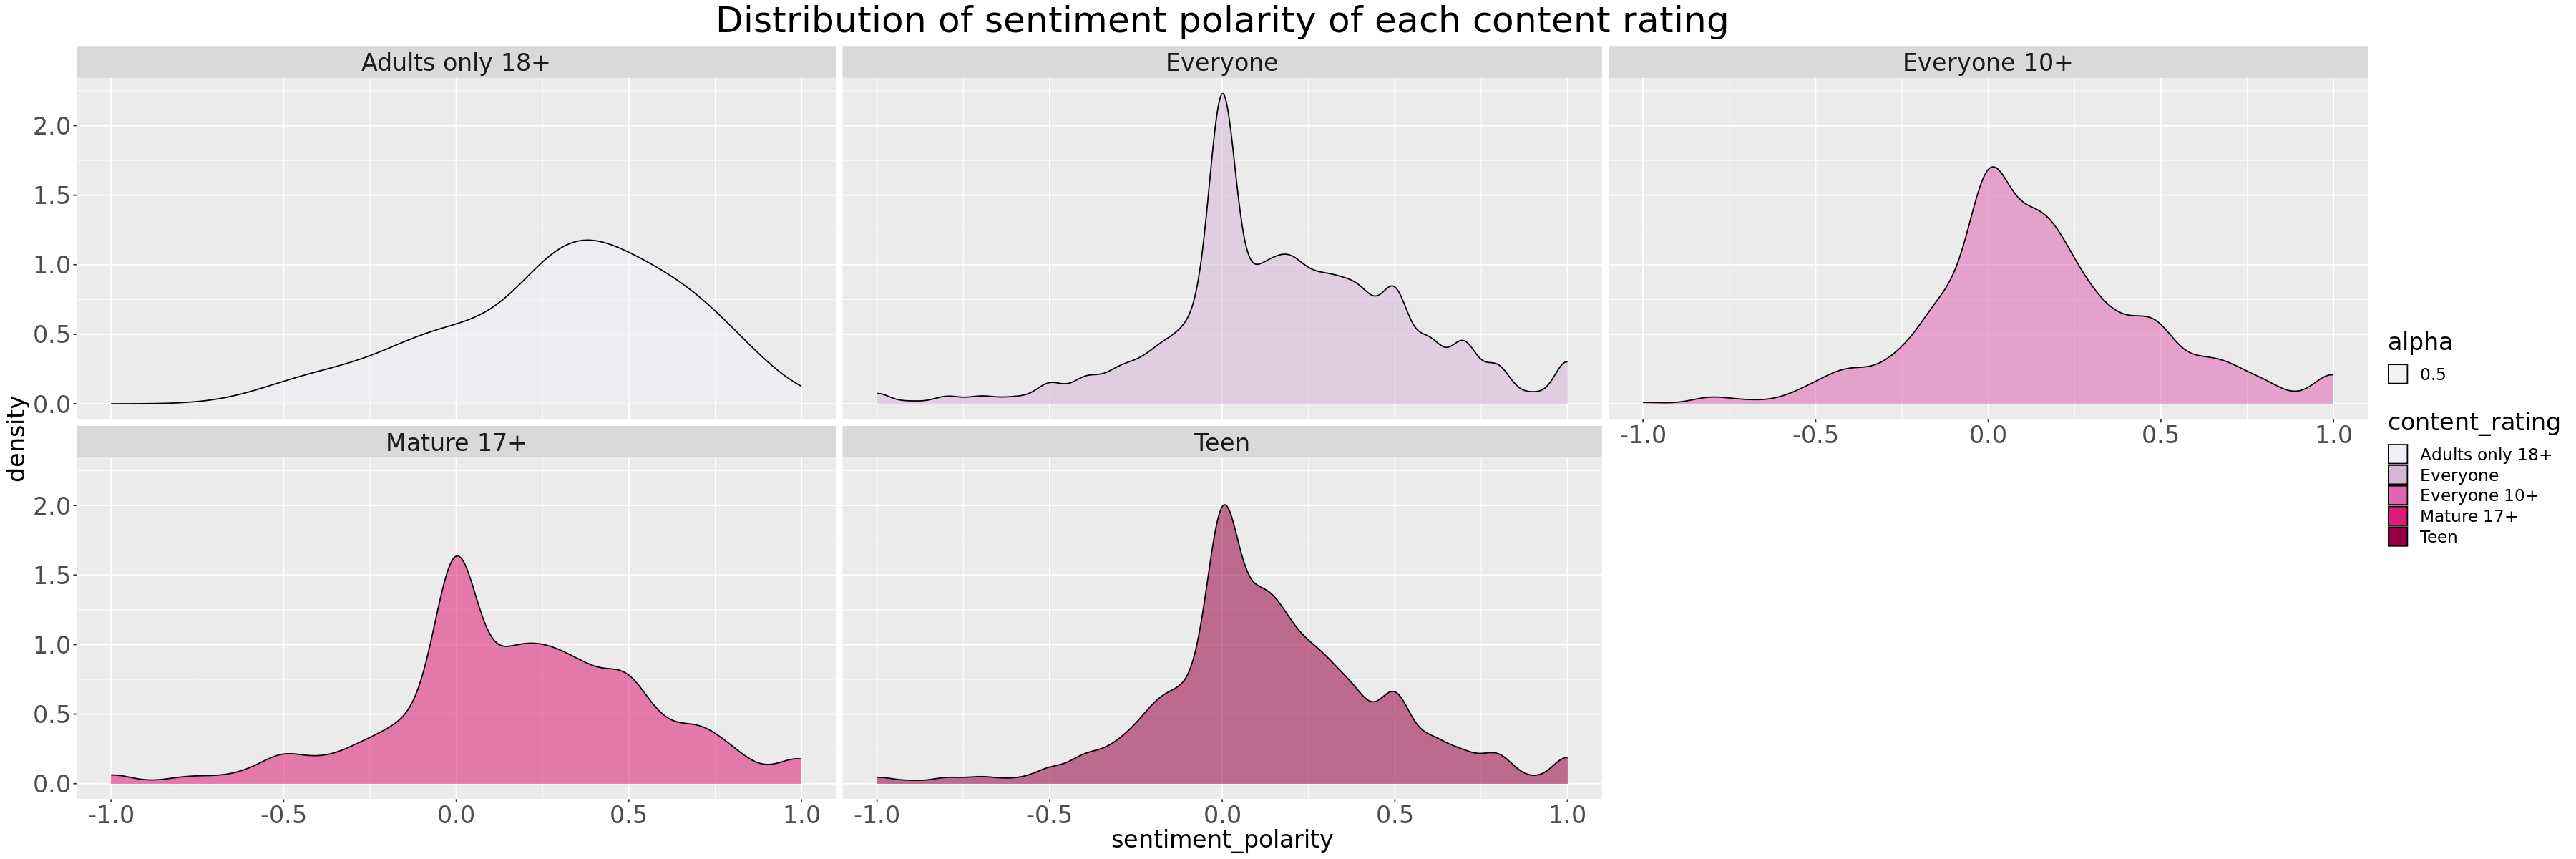

In [48]:
df_rew_join %>%
	ggplot()+
	geom_density(aes(x= sentiment_polarity, fill = content_rating, alpha = 0.5))+
	facet_wrap(.~content_rating)+
	scale_fill_brewer(type = "seq", palette = 11)+
	ggtitle("Distribution of sentiment polarity of each content rating")+
	theme(plot.title = element_text(hjust = 0.5,size= 30),
		  axis.text=element_text(size=20),
		 axis.title=element_text(size=20),
		 legend.text = element_text(size=14),
		 legend.title = element_text(size=20),
		 strip.text.x = element_text(size = 20))

	options(repr.plot.width=30, repr.plot.height=10)

The Result show sentiment polarity each content rating is normal distribution except content rating : Adult only 18+ is left skewed

### Find Median sentiment each content rating and number of positive negative sentiment polarity

In [49]:
df_rew_join %>%
		group_by(content_rating)%>%
		summarise(median = median(sentiment_polarity))

df_neu <- df_rew_join %>% 
		group_by(content_rating)%>%
		filter(sentiment_polarity == 0)%>%
		summarise(neutral = n())

df_neg <- df_rew_join %>% 
		group_by(content_rating)%>%
		filter(sentiment_polarity < 0)%>%
		summarise(negative = n())

df_pos <- df_rew_join %>% 
		group_by(content_rating)%>%
		filter(sentiment_polarity > 0)%>%
		summarise(positive = n())

df_sentiment <- df_neg %>%
					left_join(df_neu, by = "content_rating")%>%
					left_join(df_pos, by = "content_rating")%>%
					mutate(percent_negative = (negative/(negative+neutral+positive))*100,
						   percent_neutral = (neutral/(negative+neutral+positive))*100,
							 percent_positive = (positive/(negative+neutral+positive))*100)

df_sentiment

content_rating,median
<chr>,<dbl>
Adults only 18+,0.3291667
Everyone,0.1600000
Everyone 10+,0.1151042
Mature 17+,0.1608333
Teen,0.1070871


content_rating,negative,neutral,positive,percent_negative,percent_neutral,percent_positive
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Adults only 18+,6,3,27,16.66667,8.333333,75.00000
Everyone,5954,3853,17824,21.54826,13.944483,64.50726
Everyone 10+,381,151,910,26.42164,10.471567,63.10680
Mature 17+,525,382,1508,21.73913,15.817805,62.44306
Teen,1139,467,2804,25.82766,10.589569,63.58277


From median and data that show all content rating have a percent positive reviews more than negative reviews

# 03. What impact does the content rating an app receives have on its sentiment and rating

### Join data and find quantity

In [50]:
df_conrate <- df_rew %>%
	inner_join(df_rmdupapp, by = "app")%>%
	select(app:rating, content_rating,type,installs)

df_conrate

df_conrate %>%
	group_by(content_rating)%>%
	summarise(quantity = n())

app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity,category,rating,content_rating,type,installs
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.0000000,0.5333333,HEALTH_AND_FITNESS,4,Everyone 10+,Free,"500,000+"
10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.2500000,0.2884615,HEALTH_AND_FITNESS,4,Everyone 10+,Free,"500,000+"
10 Best Foods for You,Works great especially going grocery store,Positive,0.4000000,0.8750000,HEALTH_AND_FITNESS,4,Everyone 10+,Free,"500,000+"
10 Best Foods for You,Best idea us,Positive,1.0000000,0.3000000,HEALTH_AND_FITNESS,4,Everyone 10+,Free,"500,000+"
10 Best Foods for You,Best way,Positive,1.0000000,0.3000000,HEALTH_AND_FITNESS,4,Everyone 10+,Free,"500,000+"
10 Best Foods for You,Amazing,Positive,0.6000000,0.9000000,HEALTH_AND_FITNESS,4,Everyone 10+,Free,"500,000+"
10 Best Foods for You,"Looking forward app,",Neutral,0.0000000,0.0000000,HEALTH_AND_FITNESS,4,Everyone 10+,Free,"500,000+"
10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.0000000,0.0000000,HEALTH_AND_FITNESS,4,Everyone 10+,Free,"500,000+"
10 Best Foods for You,good you.,Positive,0.7000000,0.6000000,HEALTH_AND_FITNESS,4,Everyone 10+,Free,"500,000+"


content_rating,quantity
<chr>,<int>
Adults only 18+,36
Everyone,27631
Everyone 10+,1442
Mature 17+,2415
Teen,4410


### find impact content rating vs rating

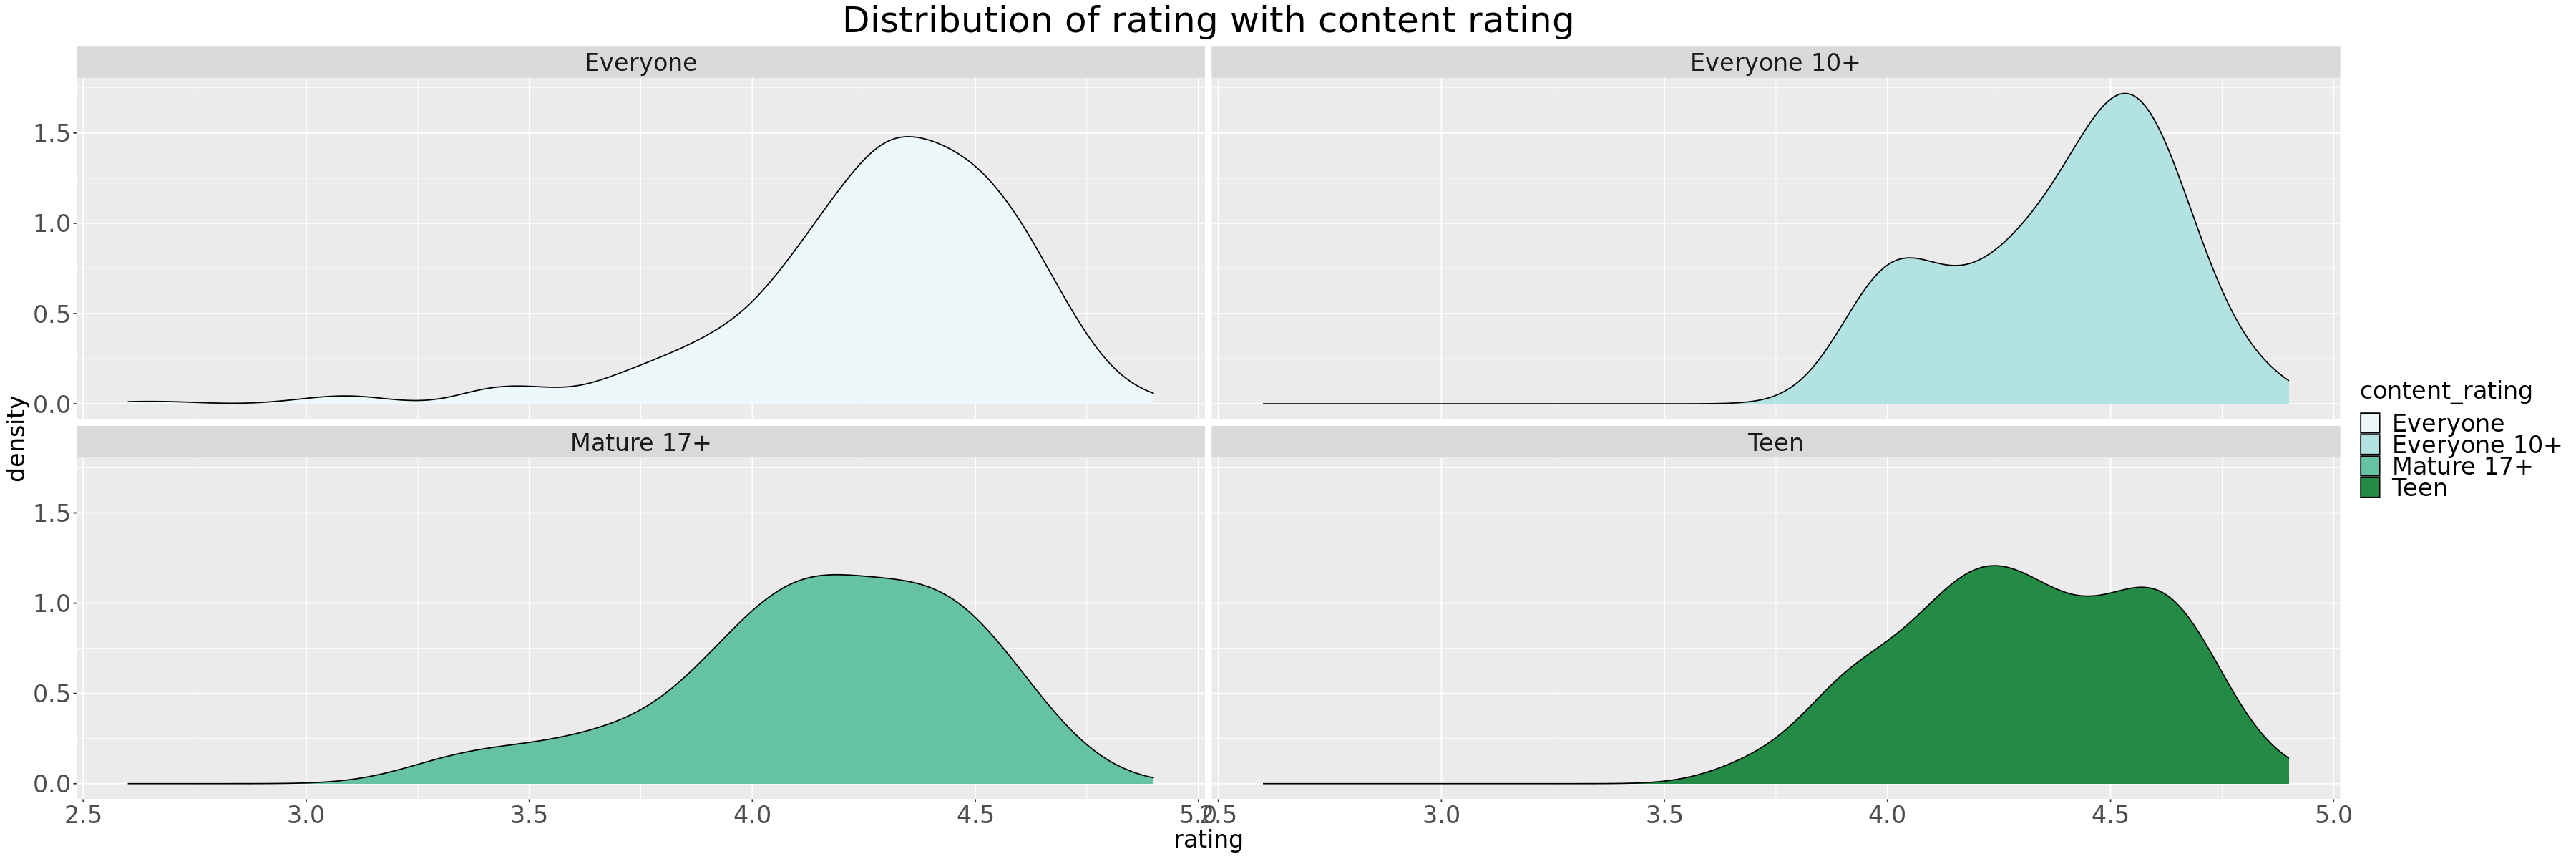

In [73]:
# find impact content rating vs rating
df_conrateclean <- df_conrate %>%
		filter(content_rating != "Adults only 18+")%>%
		group_by(app,rating,content_rating)%>%
		summarise(positive_sentiment = sum(sentiment == "Positive"),
				 negative_sentiment = sum(sentiment == "Negative"),
				  nuetral_sentiment = sum(sentiment == "Neutral"), .groups = "drop")%>%
		arrange(content_rating)

df_conrateclean_graph <- df_conrateclean %>%
		ggplot()+
		geom_density(aes(x= rating , fill = content_rating))+
		facet_wrap(.~content_rating)+
		ggtitle("Distribution of rating with content rating")+
		theme(axis.text = element_text(size = 20),
			 strip.text.x = element_text(size = 20),
			 legend.title = element_text(size=20),
			 legend.text = element_text(size=20),
			 plot.title = element_text(hjust = 0.5,size= 30),
			 axis.title = element_text(size=20))+
		scale_fill_brewer(type = "seq", palette = 2)
df_conrateclean_graph


In [78]:
df_conrateclean2 <- df_conrate %>%
		filter(content_rating != "Adults only 18+")%>%
		mutate(rating_type = ifelse(rating >= 3.5,"high rate",ifelse(rating >=2, "medium rate","low rate")))%>%
		group_by(content_rating, rating_type)%>%
		summarise(quantity = n(), .groups = 'drop')

df_conrateclean2

content_rating,rating_type,quantity
<chr>,<chr>,<int>
Everyone,high rate,27111
Everyone,medium rate,520
Everyone 10+,high rate,1442
Mature 17+,high rate,2313
Mature 17+,medium rate,102
Teen,high rate,4410


content_rating,average_rating,quantity
<chr>,<dbl>,<int>
Everyone,4.282515,652
Everyone 10+,4.389655,29
Mature 17+,4.153191,47
Teen,4.314943,87


In [79]:
sum_rating <- df_conrateclean %>%
		group_by(content_rating)%>%
		summarise(average_rating = mean(rating), quantity = n())%>%
		arrange(content_rating)

sum_rating

content_rating,average_rating,quantity
<chr>,<dbl>,<int>
Everyone,4.282515,652
Everyone 10+,4.389655,29
Mature 17+,4.153191,47
Teen,4.314943,87


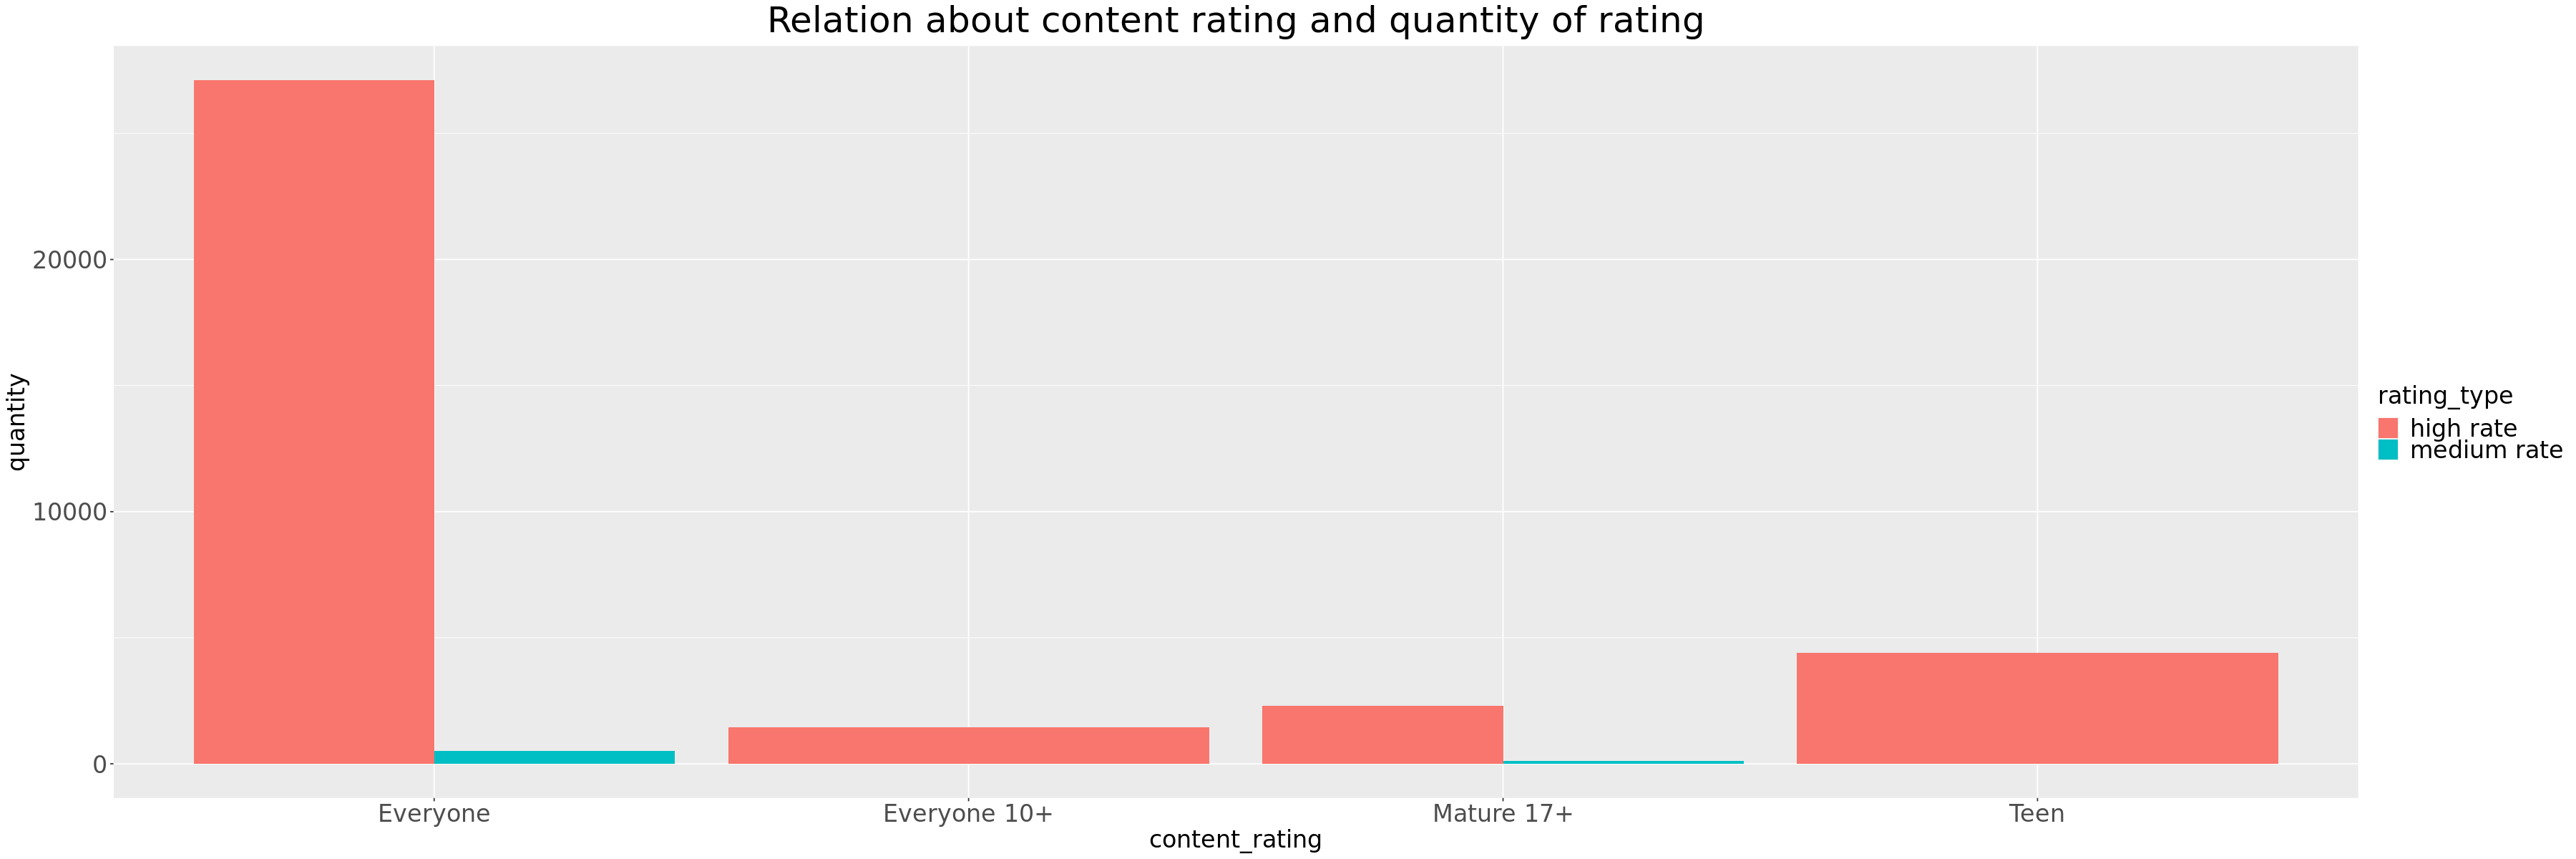

In [80]:

df_conrateclean2 %>%
	ggplot()+
	geom_bar(aes(x = content_rating, y = quantity, fill = rating_type),stat="identity", position = "dodge")+
	ggtitle("Relation about content rating and quantity of rating")+
	theme(axis.text = element_text(size = 20),
			 strip.text.x = element_text(size = 20),
			 legend.title = element_text(size=20),
			 legend.text = element_text(size=20),
			 plot.title = element_text(hjust = 0.5,size= 30),
		 axis.title = element_text(size=20))

Content rating recieve impact from rating is quantity of reviews that show content rating Everyone have a many review in high rating. And every content rating have average rating more than 4.

### find impact content rating vs sentiment

content_rating,sentiment,count_sentiment_type,count_sentiment_total,percent_sentiment_type
<chr>,<chr>,<int>,<int>,<dbl>
Everyone,Positive,17824,27631,64.50726
Everyone 10+,Positive,910,1442,63.10680
Mature 17+,Positive,1508,2415,62.44306
Teen,Positive,2804,4410,63.58277
Everyone,Neutral,3853,27631,13.94448
Everyone 10+,Neutral,151,1442,10.47157
Mature 17+,Neutral,382,2415,15.81781
Teen,Neutral,467,4410,10.58957
Everyone,Negative,5954,27631,21.54826


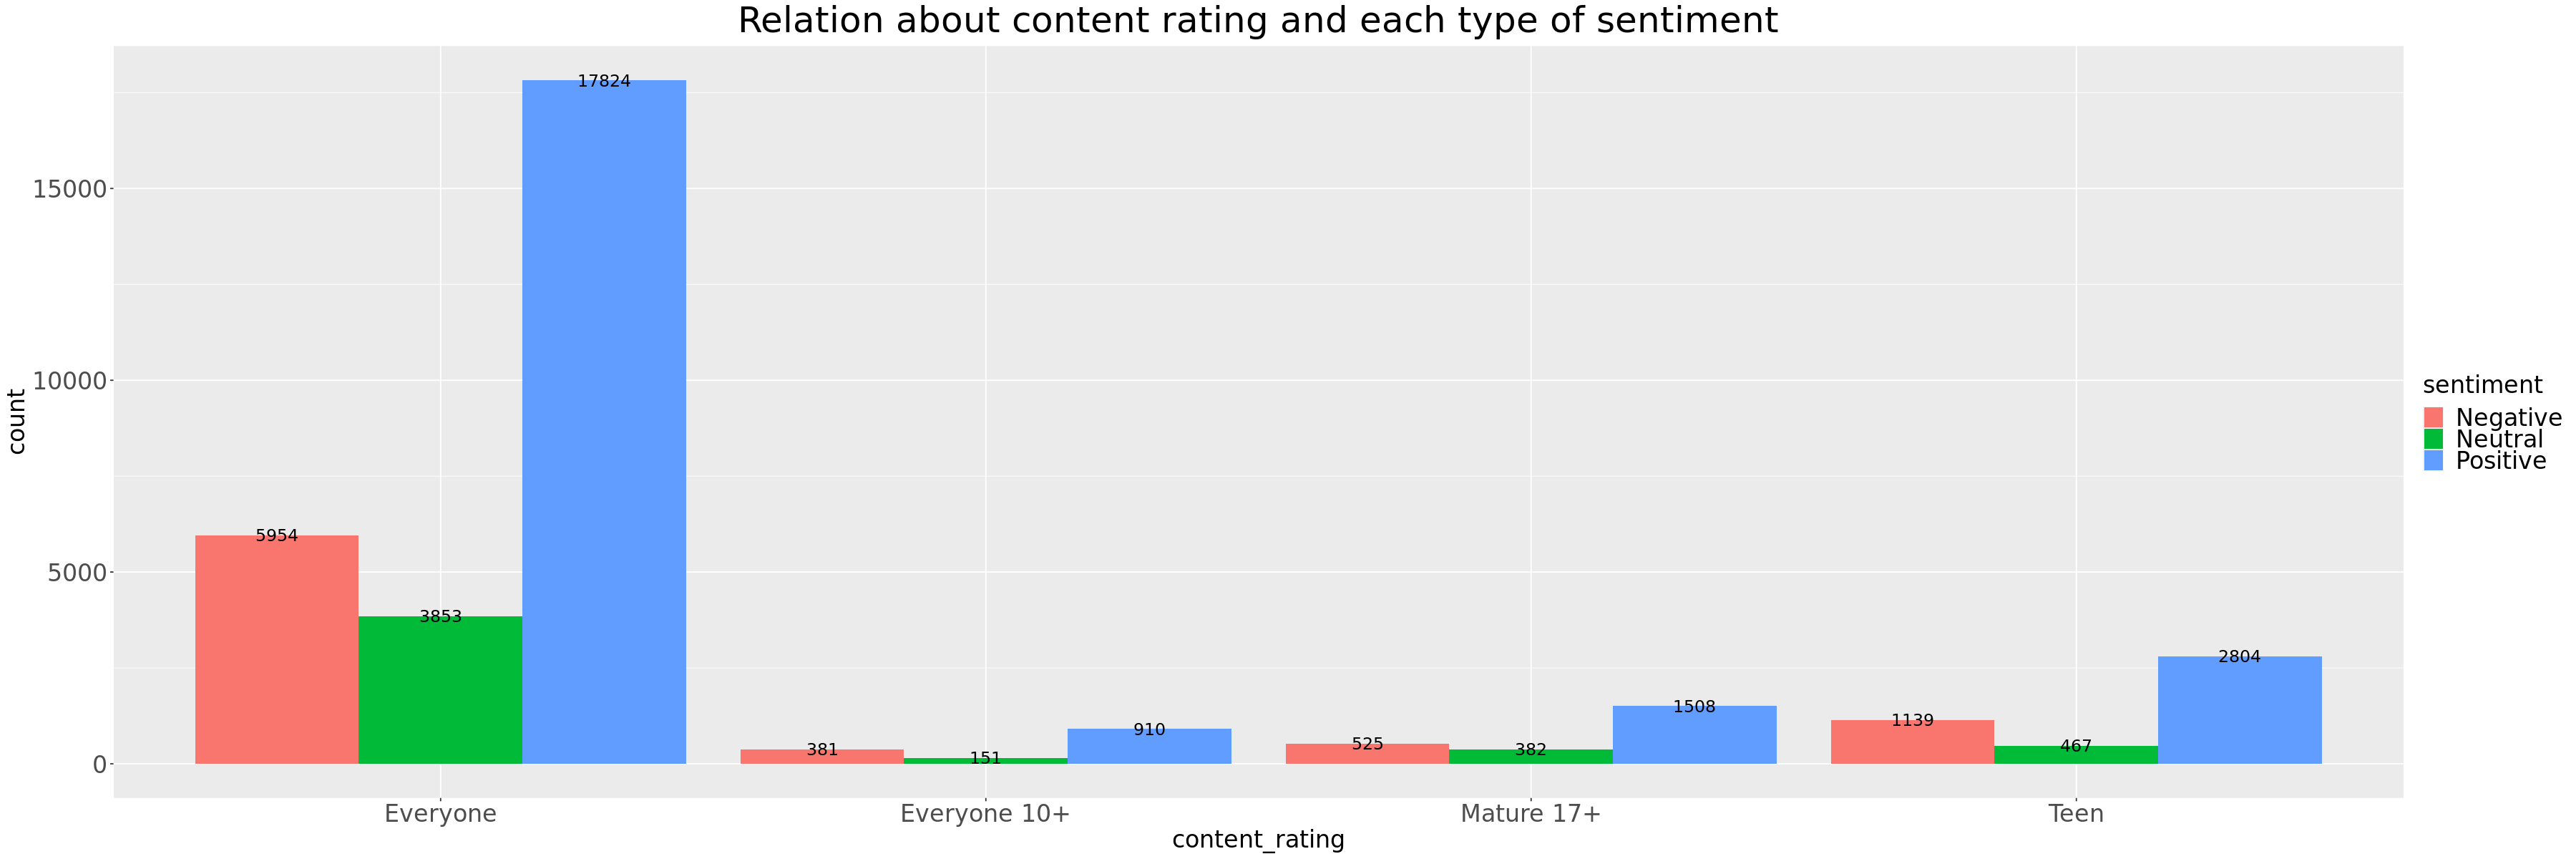

In [100]:
# find impact content rating vs sentiment
df_con_vs_sent <- df_conrate %>%
	filter(content_rating != "Adults only 18+")%>%
	group_by(content_rating,sentiment)%>%
	summarise(count = n(), .groups = "drop")

df_totalsen <- df_conrate %>%
	filter(content_rating != "Adults only 18+")%>%
	group_by(content_rating)%>%
	summarise(count = n(), .groups = "drop")

df_con_vs_sent2 <- df_con_vs_sent %>%
	left_join(df_totalsen, by = "content_rating", suffix = c("_sentiment_type","_sentiment_total"))%>%
	mutate(percent_sentiment_type = (count_sentiment_type/count_sentiment_total)*100)%>%
	arrange(desc(sentiment), content_rating)

df_con_vs_sent2

df_con_vs_sent_graph <- df_con_vs_sent%>%
							ggplot(aes(x= content_rating, y= count, fill = sentiment))+
							geom_bar(stat="identity", position = "dodge")+
							geom_text(aes(label = count), color = "black", size = 5, position = position_dodge(0.9)) +
                            ggtitle("Relation about content rating and each type of sentiment")+
							theme(plot.title = element_text(hjust = 0.5,size= 30),
		  					axis.text=element_text(size=20),
		 					axis.title=element_text(size=20),
		 					legend.text = element_text(size=20),
							legend.title = element_text(size=20))

df_con_vs_sent_graph

Content rating receive impact from sentiment is number of sentiment. If content rating have most reviews that have a many negative sentiment more than less reviews content rating but graph that show positive sentiment always more than negative sentiment. Every content rating have a same percent positive sentiment from total sentiment at 60% plus.